In [1]:
import os
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# import torch

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/baard_v4


In [3]:
import torch
from torch.utils.data import TensorDataset

from baard.classifiers import MNIST_CNN
from baard.utils.torch_utils import dataset2tensor

In [4]:
path_checkpoint = os.path.join(PATH_ROOT, 'pretrained_clf', 'mnist_cnn.ckpt')
model = MNIST_CNN.load_from_checkpoint(path_checkpoint)

In [5]:
path_clean = os.path.join(PATH_ROOT, 'results', 'exp188283', 'MNIST', 'AdvClean-1000.pt')
path_adv = os.path.join(PATH_ROOT, 'results', 'exp188283', 'MNIST', 'APGD-Linf-1000-0.22.pt')

dataset_clean = torch.load(path_clean)
print(len(dataset_clean))

dataset_adv = torch.load(path_adv)
print(len(dataset_adv))

1000
1000


In [6]:
X_clean, y_clean = dataset2tensor(dataset_clean)
X_adv, y_adv = dataset2tensor(dataset_adv)
print('     Benign:', y_clean[:10])
print('Adversarial:', y_clean[:10])


     Benign: tensor([4, 6, 5, 3, 3, 6, 0, 5, 5, 9])
Adversarial: tensor([4, 6, 5, 3, 3, 6, 0, 5, 5, 9])


In [7]:
output_adv = torch.argmax(model(X_adv[:10]), dim=1)
print(output_adv)

tensor([3, 4, 3, 8, 2, 4, 5, 8, 8, 8])


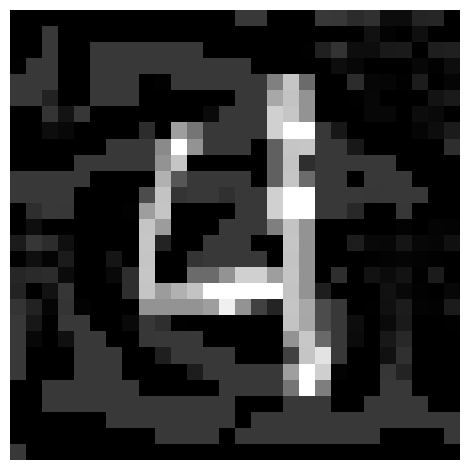

In [8]:
plt.figure()
img = X_adv[0].permute(1, 2, 0)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('adv_4.pdf', dpi=300)

In [9]:
# Find images labelled as 3
indices_3 = np.where(y_clean == 3)[0]
subset3_clean = X_clean[indices_3]

indices_4 = np.where(y_clean == 4)[0]
subset4_clean = X_clean[indices_4]

In [10]:
from torchvision.utils import make_grid

from baard.utils.torch_utils import show_top5_imgs

In [11]:
figsize = (8, 6)

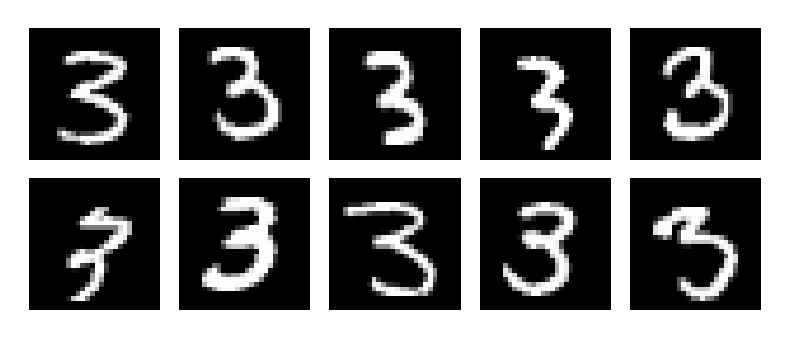

In [12]:
grid = make_grid(subset3_clean[:10], nrow=5, padding=4, pad_value=1)
grid = grid.permute(1, 2, 0)

plt.figure(figsize=figsize)
plt.imshow(grid.numpy(), cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('clean3.pdf', dpi=300)

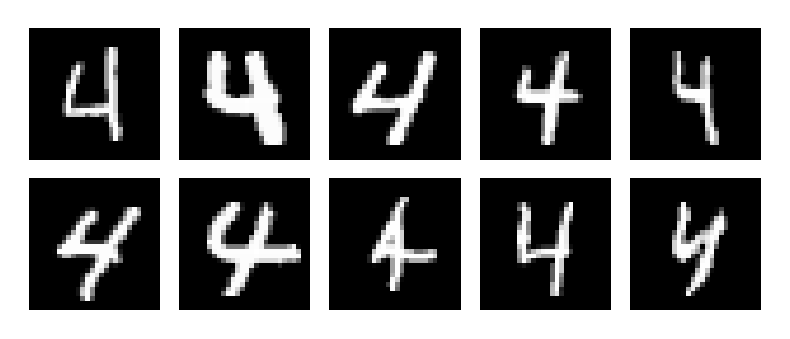

In [13]:
grid = make_grid(subset4_clean[:10], nrow=5, padding=4, pad_value=1)
grid = grid.permute(1, 2, 0)

plt.figure(figsize=figsize)
plt.imshow(grid.numpy(), cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('clean4.pdf', dpi=300)


In [14]:
data = {
    'Label': np.arange(10),
    'Probability output': [0.03,0.01,0.04,0.06,0.72,0.01,0.02,0.01, 0.08,0.02],
    'Data': 'Neighbors',
}
df = pd.DataFrame(data)
data2 = {
    'Label': np.arange(10),
    'Probability output': np.zeros(10) + 0.01,
    'Data': 'Adversarial',
}
data2['Probability output'][3] = 0.89
data2['Probability output'][4] = 0.03
df = pd.concat([df, pd.DataFrame(data2)])

In [15]:
ibm_color_palette = [
    '#6D88C4',
    '#DC257F',
    '#6C63AC',
    '#F26322',
    '#FCB017',
]
# sns.set_palette(ibm_color_palette)
sns.set_theme(
    style='white', 
    palette=ibm_color_palette, 
    font_scale=1.3,
)
sns.set_style('ticks')


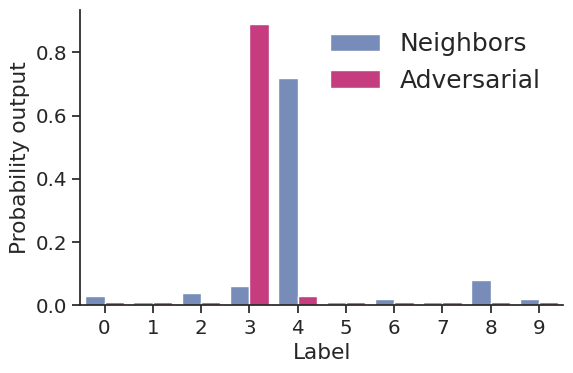

In [16]:
plt.figure(figsize=(6,4))
ax = sns.barplot(df, x='Label', y='Probability output', hue='Data')
sns.despine(bottom = False, left = False)
plt.tight_layout()
plt.legend(fontsize=18)
ax.legend_.set_title(None)
ax.legend_.get_frame().set_linewidth(0.0)
plt.savefig('decidability.pdf', dpi=300)